In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.shape

(5572, 5)

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
605,ham,TaKe CaRE n gET WeLL sOOn,NaN,NaN,NaN
182,ham,ok. I am a gentleman and will treat you with d...,NaN,NaN,NaN
2063,spam,"URGENT! Your mobile No *********** WON a å£2,0...",NaN,NaN,NaN
5210,ham,Dai i downloaded but there is only exe file wh...,NaN,NaN,NaN
876,ham,Are you in castor? You need to see something,NaN,NaN,NaN


In [4]:
#1 data cleaning 
#2 eda
#3 text preprocessing 
#4 model building
#5 evaluation 
#6 improvement 
#7 website 
#8 deployement 

In [5]:
#1 data cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 cols 
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' ], inplace=True)

In [7]:
df.sample(4)

,v1,v2
1559,ham,Single line with a big meaning::::: \Miss anyt...
2738,ham,I sent you the prices and do you mean the &lt...
3127,ham,would u fuckin believe it they didnt know i ha...
4185,ham,"Hmm ok, i'll stay for like an hour cos my eye ..."


In [8]:
df.sample(15)

,v1,v2
740,ham,Yes i will be there. Glad you made it.
4650,spam,A å£400 XMAS REWARD IS WAITING FOR YOU! Our co...
64,ham,Ok lar i double check wif da hair dresser alre...
1591,ham,That's my honeymoon outfit. :)
975,ham,Hey no I ad a crap nite was borin without ya 2...
4592,ham,It's ok i wun b angry. Msg u aft i come home t...
1539,ham,You're not sure that I'm not trying to make xa...
1568,ham,Today is ACCEPT DAY..U Accept me as? Brother S...
1922,ham,I'll be in sch fr 4-6... I dun haf da book in ...
4575,spam,Congratulations ur awarded 500 of CD vouchers ...


In [9]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [10]:
df.sample(5)

,target,text
3927,ham,Babe ? I lost you ... Will you try rebooting ?
2926,ham,Ok... U enjoy ur shows...
2948,ham,at bruce b downs &amp; fletcher now
1829,spam,Hottest pics straight to your phone!! See me g...
607,ham,what I meant to say is cant wait to see u agai...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

## eda

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

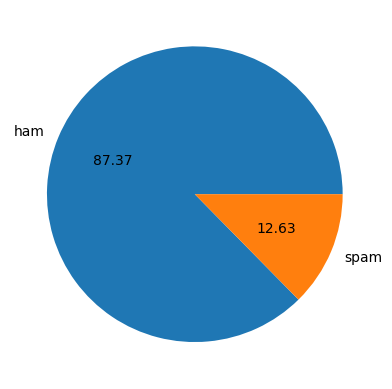

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [21]:
# data is imbalanced 

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#num of words
from nltk.tokenize import word_tokenize
df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [34]:
nltk.download('punkt_tab')
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [36]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [37]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.965564
std,58.236293,11.068488,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,22.000000,2.000000
max,910.000000,171.000000,38.000000


In [38]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.820195
std,56.358207,11.116240,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,38.000000


In [39]:
# spam 
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.970904
std,30.137753,5.967672,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

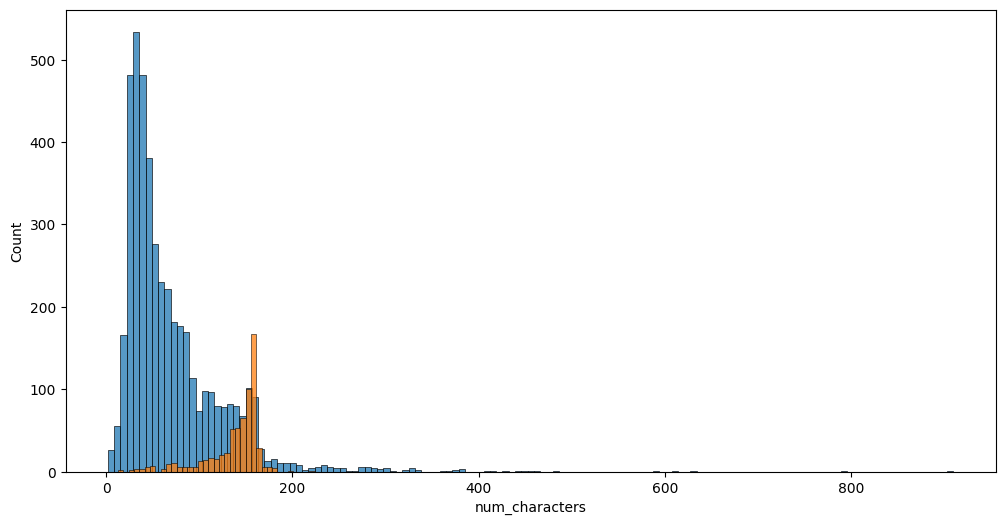

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

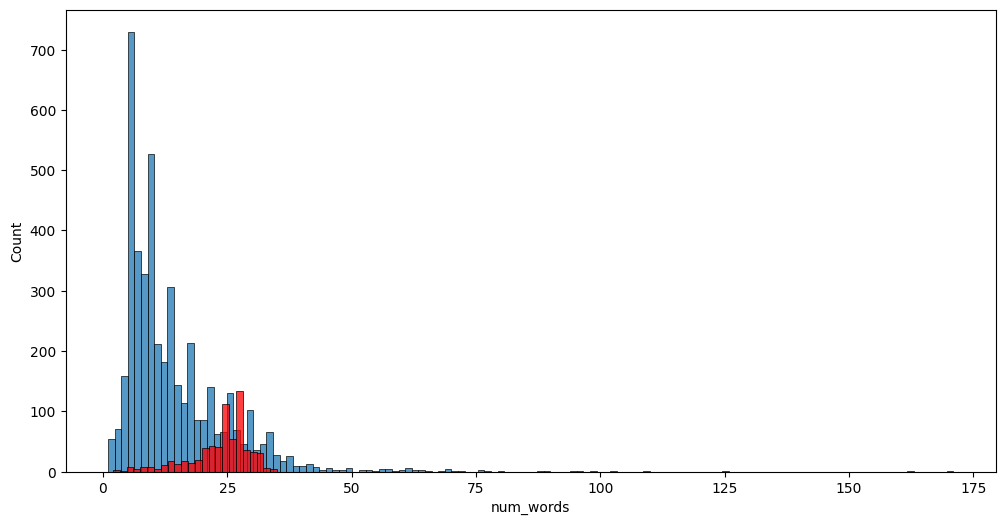

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

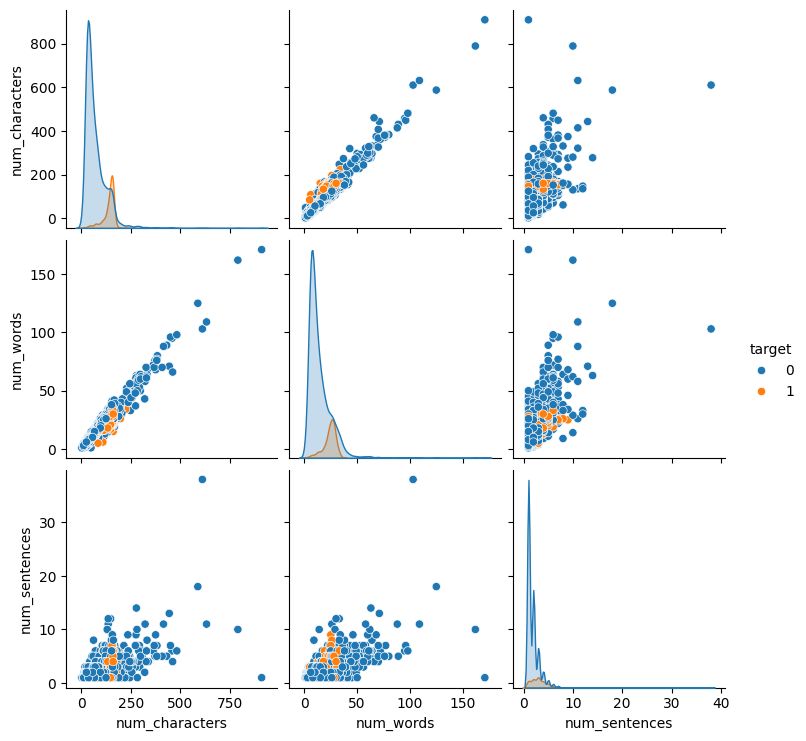

In [43]:
sns.pairplot(df, hue='target')

<Axes: >

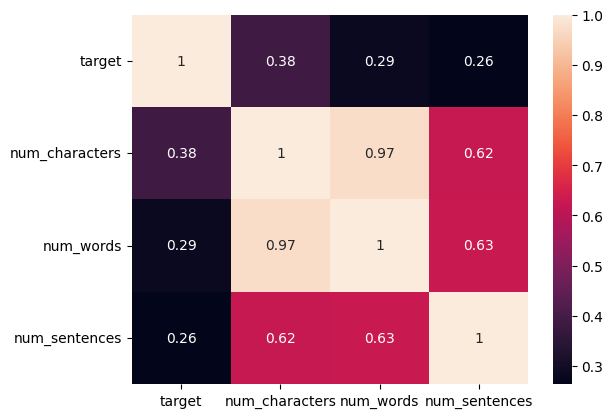

In [44]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

Data preprocessing 
-> lower case 
-> remove special chars
-> tokenization 
-> remove stop words and punctuations 
-> stemming 

In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [48]:
def transformText(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [49]:
transformText('Hi how are You')

'hi'

In [50]:
df['transformed_text'] = df['text'].apply(transformText)

In [51]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [52]:
# !pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [53]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

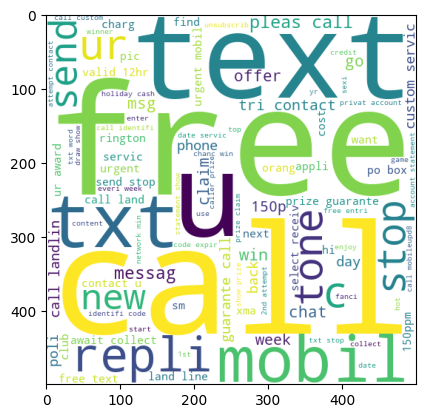

In [54]:
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

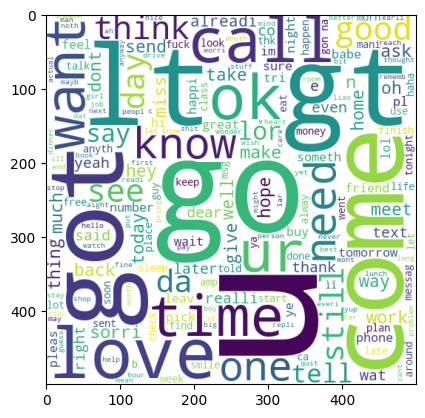

In [56]:
plt.imshow(ham_wc)

In [61]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9939

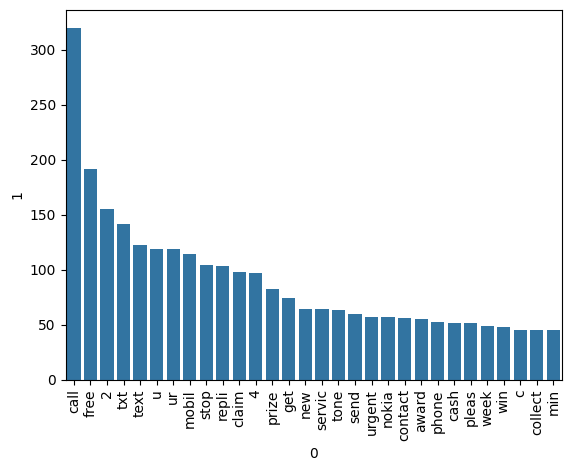

In [70]:
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [73]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [74]:
len(ham_corpus)

35404

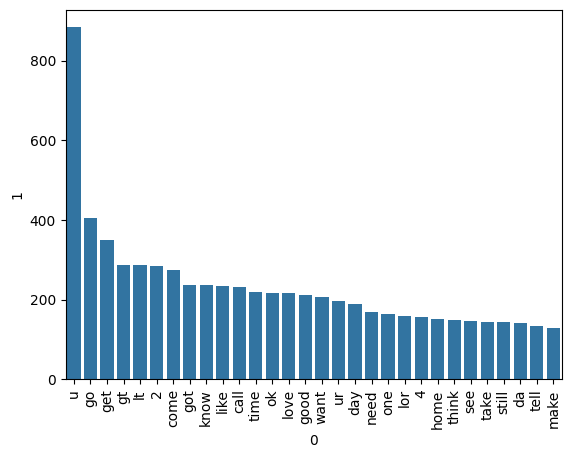

In [75]:
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [98]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [79]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [80]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6708))

In [81]:
y = df['target'].values

In [82]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [90]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [86]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [96]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [97]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [99]:
# tfidf
M = tfidf.fit_transform(df['transformed_text']).toarray()

In [100]:
n = df['target'].values

In [101]:
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state=2)

In [102]:
gnb.fit(M_train, n_train)
n_pred1 = gnb.predict(M_test)
print(accuracy_score(n_test, n_pred1))
print(confusion_matrix(n_test, n_pred1))
print(precision_score(n_test, n_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [104]:
mnb.fit(M_train, n_train)
n_pred2 = mnb.predict(M_test)
print(accuracy_score(n_test, n_pred2))
print(confusion_matrix(n_test, n_pred2))
print(precision_score(n_test, n_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [105]:
bnb.fit(M_train, n_train)
n_pred3 = bnb.predict(M_test)
print(accuracy_score(n_test, n_pred3))
print(confusion_matrix(n_test, n_pred3))
print(precision_score(n_test, n_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [107]:
# we'll choose tfidf with mnb

In [108]:
import pickle 

In [109]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))